In [1]:
!pip install fastai --upgrade -q

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the 'C:\Users\yashs\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [2]:
from fastai.vision.all import *

C:\Users\yashs\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\torchvision\io\image.py:11: UserWarning: Failed to load image Python extension: Could not find module 'C:\Users\yashs\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\torchvision\image.pyd' (or one of its dependencies). Try using the full path with constructor syntax.
  warn(f"Failed to load image Python extension: {e}")


In [3]:
fields = DataBlock(blocks=(ImageBlock, CategoryBlock),
   get_items=get_image_files,
   get_y=parent_label,
   splitter=RandomSplitter(valid_pct=0.2, seed=42))

In [4]:
train_path = r"C:\Yash\Projects\Puzzle_Solver\train\train"
dls = fields.dataloaders(train_path)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


In [5]:
dls.vocab

['0123', '0132', '0213', '0231', '0312', '0321', '1023', '1032', '1203', '1230', '1302', '1320', '2013', '2031', '2103', '2130', '2301', '2310', '3012', '3021', '3102', '3120', '3201', '3210']

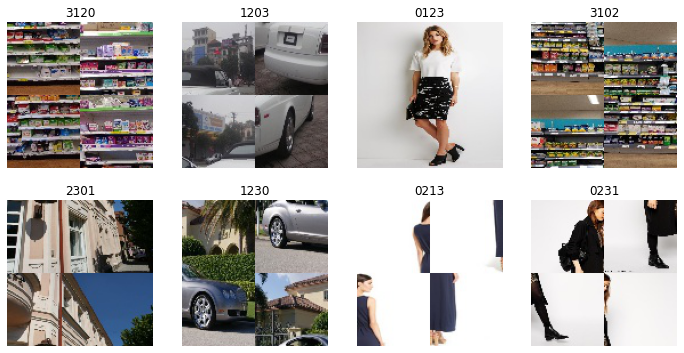

In [6]:
dls.train.show_batch(max_n=8, nrows=2)

In [7]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)

C:\Users\yashs\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\fastai\vision\learner.py:284: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to C:\Users\yashs/.cache\torch\hub\checkpoints\resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:19<00:00, 4.49MB/s]


In [9]:
# lr_min, lr_steep = learn.lr_find()

In [10]:
learn.fit_one_cycle(5, 1e-2)

epoch,train_loss,valid_loss,error_rate,time
